## Practical Task 2

In [7]:
#Importing the relevant modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [37]:
# Import the insurance data

df = pd.read_csv("diabetes_updated.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


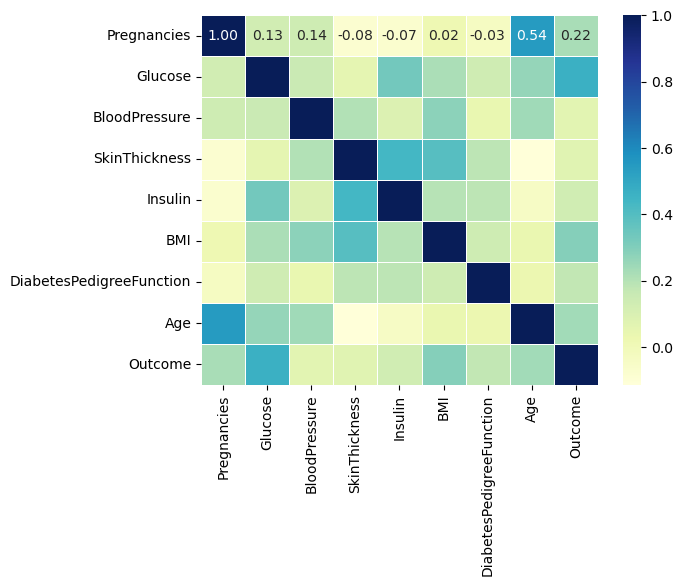

In [39]:
# Plot the distribution of the data
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidth=0.5,fmt=".2f")
plt.show()

Observation: From the heatmap above, we can see that the level of glucose depends on Age, BMI and Insulin levels

1) Age
2) BMI


In [68]:
# Dropping the parameters that are not deemed relevant in the analysis
diabetes_df=df.drop(['BloodPressure','Insulin','SkinThickness','DiabetesPedigreeFunction','Pregnancies','Outcome'],axis=1)
diabetes_df

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


## Age Model

In [70]:
#The independent variabels chosen are 1) Age, 2) BMI, 3) Insulin Levels

# Setting Age as independent variable x
x=diabetes_df.iloc[:,2].values
x=x.reshape(-1, 1)


# Setting Glucose level as dependent variable y
y=diabetes_df.iloc[:,0].values
y=y.reshape(-1,1)

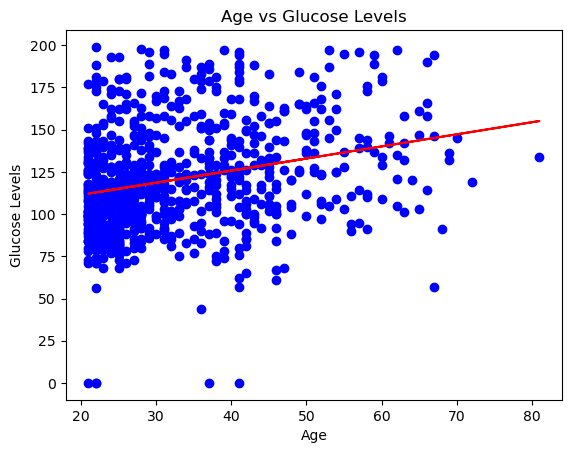

In [71]:
# Create an empty linear regression model
age_model = LinearRegression()

# Create the model using fit(x,y)
age_model.fit(x,y)

# Use model to make a prediction
y_pred = age_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,age_model.predict(x),color = 'r')
plt.title('Age vs Glucose Levels')
plt.xlabel('Age')
plt.ylabel('Glucose Levels')
plt.show()

In [72]:
# Age model coefficients
print('Coefficients: \n', age_model.coef_)

Coefficients: 
 [[0.7164181]]


## BMI Model

In [73]:
#The independent variabels chosen are 1) Age, 2) BMI, 3) Insulin Levels

# Setting BMI as independent variable x
x=diabetes_df.iloc[:,1].values
x=x.reshape(-1, 1)

# Setting Glucose level as dependent variable y
y=diabetes_df.iloc[:,0].values
y=y.reshape(-1,1)

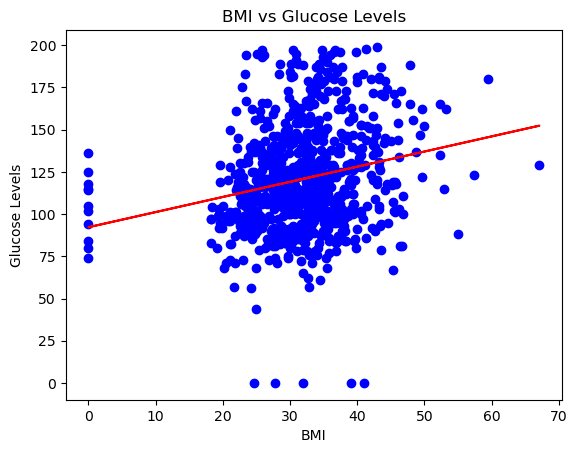

In [74]:
# Create an empty linear regression model
bmi_model = LinearRegression()

# Create the model using fit(x,y)
bmi_model.fit(x,y)

# Use model to make a prediction
y_pred = bmi_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,bmi_model.predict(x),color = 'r')
plt.title('BMI vs Glucose Levels')
plt.xlabel('BMI')
plt.ylabel('Glucose Levels')
plt.show()

In [75]:
# BMI model coefficients
print('Coefficients: \n', bmi_model.coef_)

Coefficients: 
 [[0.89650903]]


In [87]:
# Storing the independent variables (BMI, Age) in an two dimensional array.
X = diabetes_df.iloc[:,[1, 2]].values
X[0:4]

array([[33.6, 50. ],
       [26.6, 31. ],
       [23.3, 32. ],
       [28.1, 21. ]])

In [83]:
# Storing the dependent variables (Glucose levels) in an 1 dimensional array
y = diabetes_df.iloc[:,0].values
y = y.reshape(-1, 1)


In [85]:
# Storing the independent variables into a 1 dimensional array
X = X.reshape(-1, X.shape[1])
print(X)

[[33.6 50. ]
 [26.6 31. ]
 [23.3 32. ]
 ...
 [26.2 30. ]
 [30.1 47. ]
 [30.4 23. ]]


In [88]:
# Create an empty linear regression model
diabetes_model = LinearRegression()

# Create the model using fit(X,y)
diabetes_model.fit(X,y)

# Get intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [70.29517231]
Coefficients: 
 [[0.85890806 0.69554933]]


## Training and test samples

In [96]:
# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)


Training data: (614, 2) (614, 1)
Test data: (154, 2) (154, 1)


c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


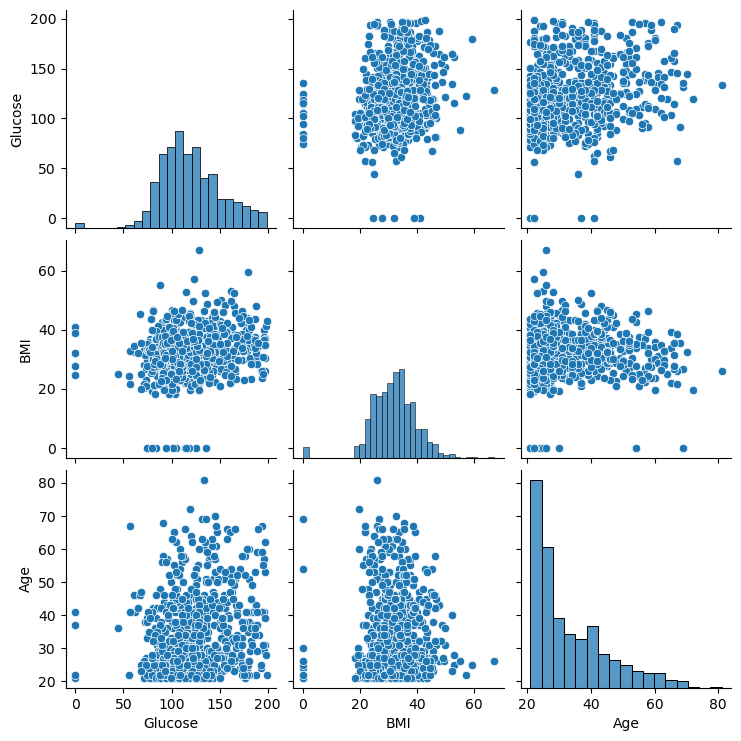

In [97]:
# Plot the distribution of the data
sns.pairplot(data=diabetes_df)

It appears that the features don't follow a Gaussian distribution and therefore we will normalize our data using MinMaxScaler

In [98]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [109]:
# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 [86.10185728]
Coefficients: 
 [[56.08227166 39.82403015]]


In [119]:
# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))


R2 Score: 0.1371
